# Graph Visualization

Week 2 Part 1 Assignment *Team 2: Raghunathan Ramnath and Dilip Ganesan

# Abstract


The goals of this assignment are

i)   Load a graph database of your choosing from a text file or other source.

ii)  Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.

iii) Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

iv)  Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

# Data Source


We are using the dataset from https://snap.stanford.edu/data/ related to "Social circles: Facebook".
The file name is "facebook_combined.txt.gz" and the file description is "Edges from all egonets combined".
 

# Software 


We will be using Ananconda and Jupyter notebook for documentation and networkx libraries. Gephi graph database is used for visualization.

# Analysis

In [21]:
# Importing packages
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import csv

# Importing packages used to display images
import urllib.request
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

% matplotlib inline

In [ ]:
# Read data from file from the URL. 
# The create a graph object and set the nodes and edges to that graph object.
target_url ='https://raw.githubusercontent.com/raghu74us/DATA-620/master/week3/facebook_combined.txt'

graphobj = nx.Graph(name="FaceBook Analysis")
data = urllib.request.urlopen(target_url).read().decode('utf8').split("\n")
fileobj = csv.reader(data, delimiter=' ')
fileobj = list(fileobj)

# Iterate the fileobject and building the edges.
for line in fileobj: 
    graphobj.add_edge(line[0], line[1])


In [19]:
# Next for analysis, we are converting the list to dataframe and inspecting the elements.
#view the Top 5 rows
fbd = pd.DataFrame(fileobj)
fbd.columns = ['FromNodeId','ToNodeId']
fbd.head(5)

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [20]:
#view the Bottom 5 rows
fbd.tail(5)

,FromNodeId,ToNodeId
88230,4027,4031
88231,4027,4032
88232,4027,4038
88233,4031,4038
88234,None,None


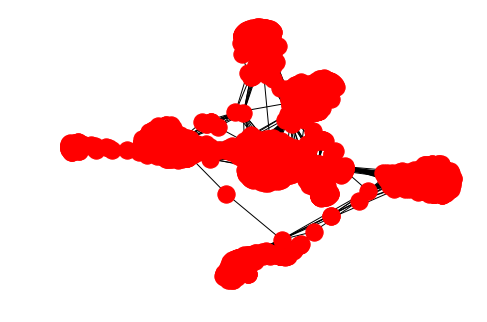

In [31]:
# After going through all layouts we picked spring layout. Because it was more visually pleasing for 3-D space.
# Position nodes using Fruchterman-Reingold force-directed algorithm.
nx.draw(graphobj, pos=nx.spring_layout(graphobj))

In [26]:
# We did some basic analysis on the graph.
# Nodes, Edges, Average Degree.
N, K = graphobj.order(), graphobj.size() 
avg_deg = float(K) / N
print ("Nodes: ", N )
print ("Edges: ", K )
print ("Average degree: ", avg_deg )


Nodes:  4039
Edges:  88234
Average degree:  21.84550631344392


In [32]:
# We are going to see the diameter.
nx.diameter(graphobj)

8

(array([ 969.,   26.,   13.,   11.,    4.,    4.,    4.,    5.,    7.,    3.]),
 array([   0. ,   11.1,   22.2,   33.3,   44.4,   55.5,   66.6,   77.7,
          88.8,   99.9,  111. ]),
 <a list of 10 Patch objects>)

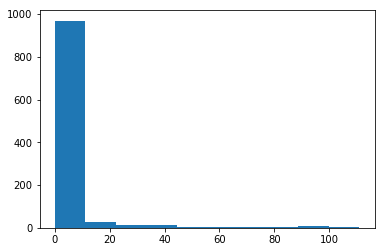

In [35]:
# Next we see the degree of node, It says how many edges are near to the node.
nx.degree(graphobj)
nx.degree_histogram(graphobj)
plt.hist(nx.degree_histogram(graphobj))

In [36]:
nx.density(graphobj)

0.010819963503439287

In [37]:
nx.write_gexf(graphobj, 'facebookdb.gexf')

![Image]("/facebook.png")